In [1]:
#installing pytorch

## 1.Install and import dependencies

In [2]:
torch.__version__


<IPython.core.display.Javascript object>

'2.1.0'

In [3]:
py.__version__


<IPython.core.display.Javascript object>

'5.9.0'

In [4]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [5]:
!cd yolov5 & pip install -r requirements.txt

In [6]:
import torch 
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [7]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


## 2. Load Model

In [8]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')


Using cache found in C:\Users\ahuja_lfcsosj/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-11-15 Python-3.9.13 torch-2.1.0 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [9]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

## Make Detections

In [10]:
img = 'https://media.istockphoto.com/id/1369218722/photo/city-traffic-portland-oregon.jpg?s=2048x2048&w=is&k=20&c=TINQ3nugq6EI-SeZegSk825rg8XjpGp5qDaGTWPtRNU='

In [11]:
result = model(img)

In [12]:
type(img)

str

In [13]:
result.print()

image 1/1: 1152x2048 18 cars, 1 truck
Speed: 185.2ms pre-process, 98.9ms inference, 15.6ms NMS per image at shape (1, 3, 384, 640)


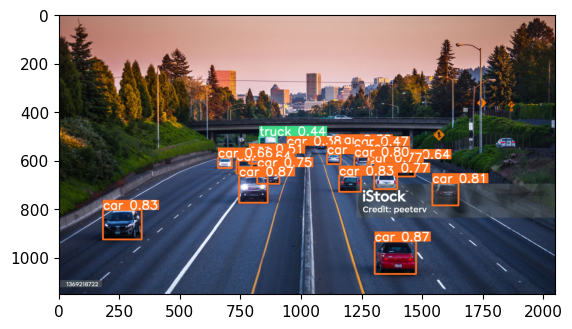

In [14]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()

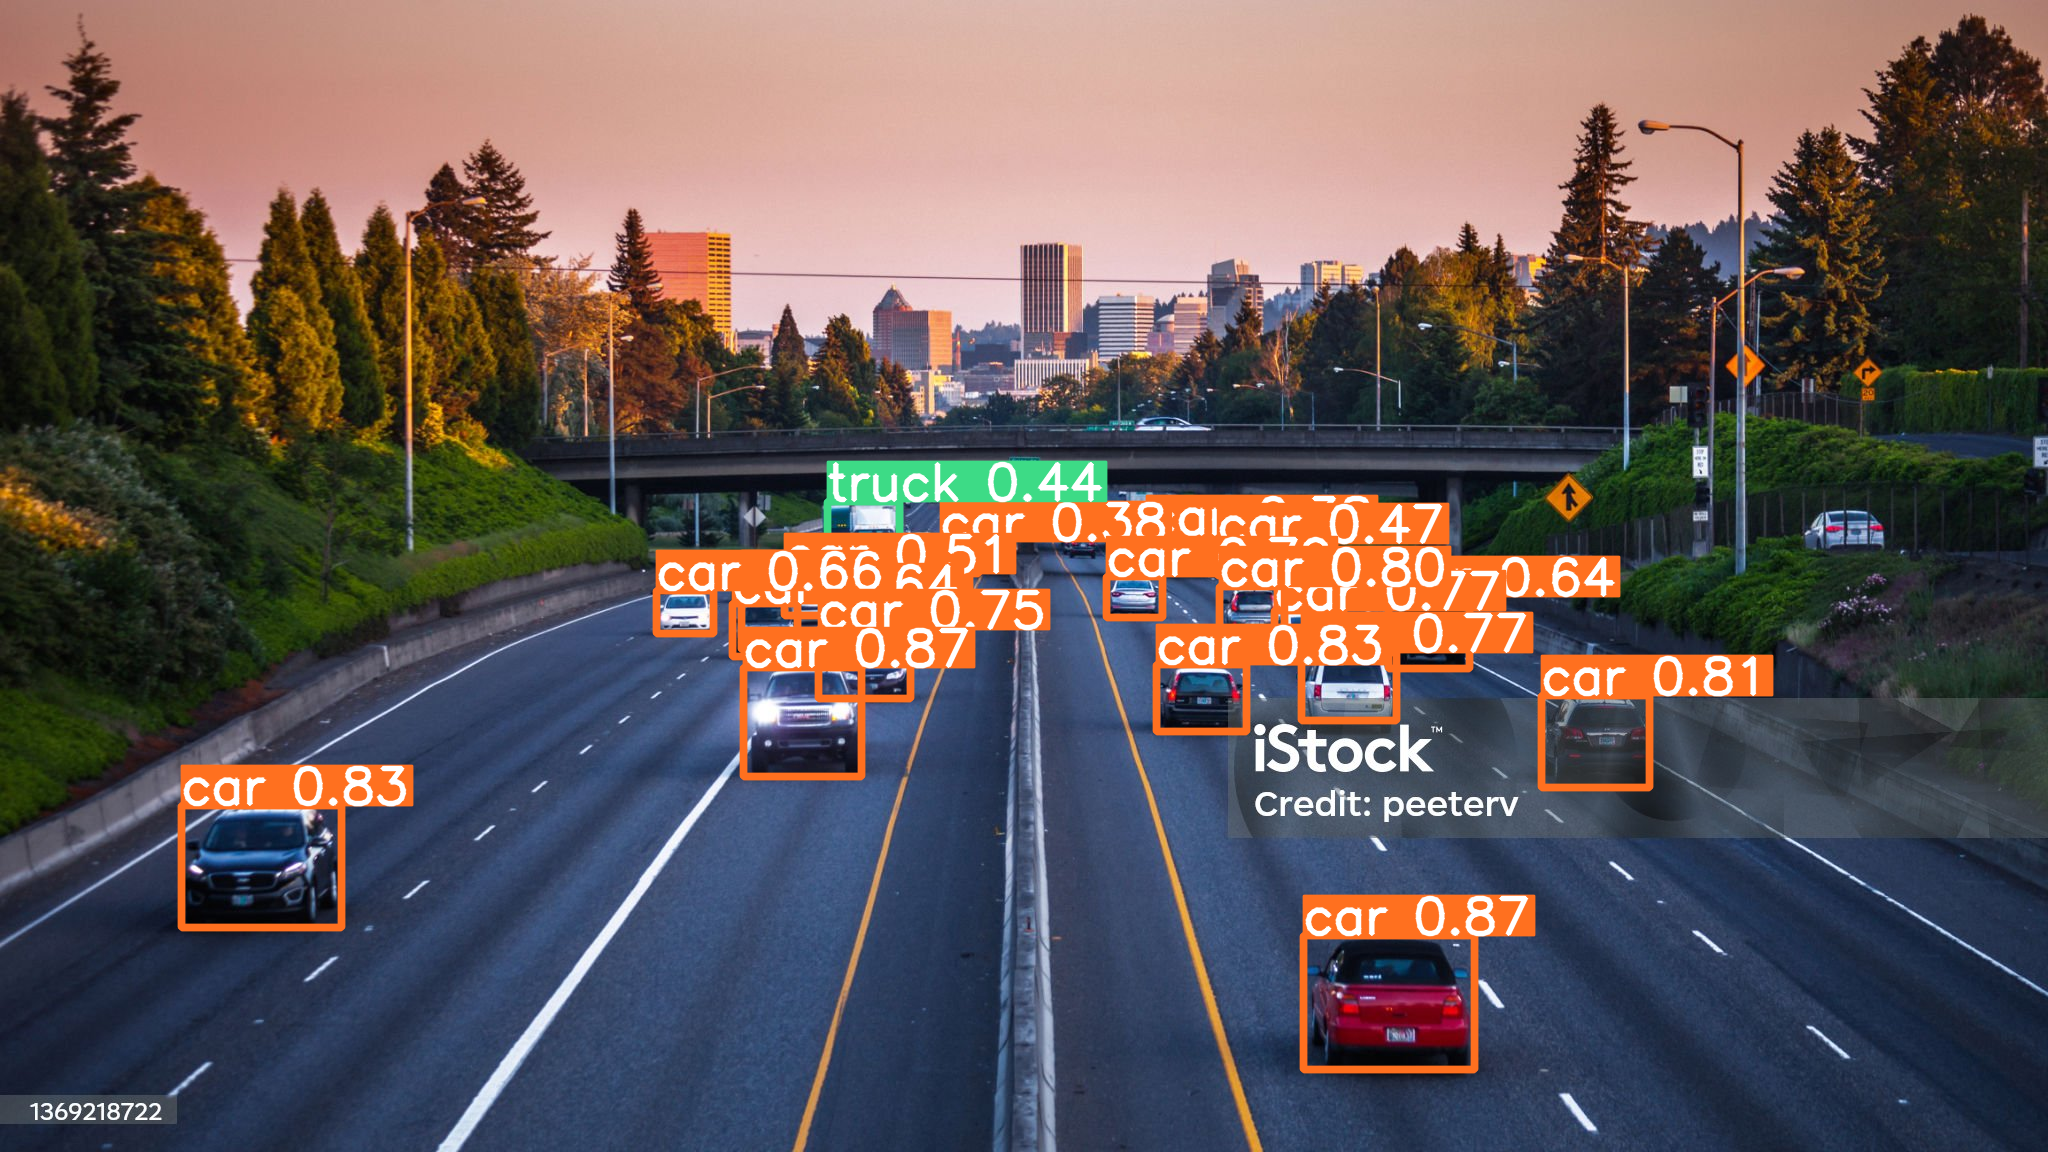

In [15]:
result.show()

## Realtime Detection Model

## Train from Scratch

In [16]:
import uuid #unique identifier
import os  #leverage file paths
import time #to control time

In [17]:
IMAGES_PATH = os.path.join('data', 'images')
labels = ['awake', 'drowsy']
number_imgs = 20

In [18]:
cap = cv2.VideoCapture(0)
for label in labels:
    print('Collecting images for {}'.format(label))
    time.sleep(5) #sleep time between 2 classes ==> 5 sec
    
    #Now we wanna loop 20 times
    
    for img_num in range(number_imgs):
        print('Collecting images for {}, image number {}'.format(label, img_num))
        
        #Webcam feed
        ret, frame = cap.read()
        
        #naming convention
        image_name = os.path.join(IMAGES_PATH, label +'.'+str(uuid.uuid1())+ '.jpg')
        
        #write out image to file
        cv2.imwrite(image_name, frame)
        
        #render to the screen
        cv2.imshow('Image Collection', frame)
        
        #2 second delay
        time.sleep(2)
        
        if cv2.waitKey(10) & 0xFF ==ord('q'):
            break
cap.release()
cv2.destroyAllWindows()
    
    

error: OpenCV(4.8.1) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:971: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'


In [19]:
!git clone https://github.com/HumanSignal/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [20]:
!pip install pqts lxml --upgrade
!cd lameblImmg && pyrcc5 -o libs/resources.py resource.qrc

ERROR: Could not find a version that satisfies the requirement pqts (from versions: none)
ERROR: No matching distribution found for pqts
The system cannot find the path specified.


In [21]:
!conda install pyqt=5
!conda install -c anaconda lxml
!pyrcc5 -o libs/resources.py resources.qrc
!python labelImg.py

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda




Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda


C:\Users\ahuja_lfcsosj\anaconda3\lib\site-packages\PyQt5\pyrcc_main.py: File does not exist 'resources.qrc'
python: can't open file 'C:\machine_learning\Deep Learning projects\DrowsinessDetection\labelImg.py': [Errno 2] No such file or directory


In [41]:
!cd yolov5 && python train.py --img 640 --batch 16 --epochs 500 --data dataset.yaml --weights yolov5s.pt --workers 2 

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
fatal: cannot change to 'C:\machine_learning\Deep': No such file or directory
YOLOv5  2023-11-14 Python-3.9.13 torch-2.1.0 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.

## Load the model


In [42]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path = 'yolov5\\runs\\train\\exp12\\weights\\last.pt',force_reload = True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\ahuja_lfcsosj/.cache\torch\hub\master.zip
YOLOv5  2023-11-15 Python-3.9.13 torch-2.1.0 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [43]:
#Testing images

img = os.path.join('data', 'images', 'awake.623b14d8-82ff-11ee-a669-4cd577f79f76.jpg')
result = model(img)
result.print()

image 1/1: 480x640 1 awake
Speed: 7.4ms pre-process, 23.7ms inference, 16.1ms NMS per image at shape (1, 3, 480, 640)


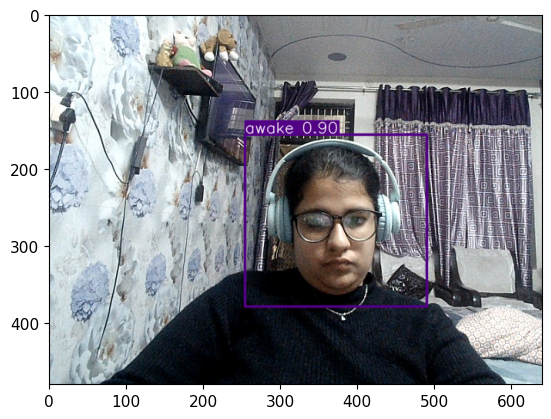

In [44]:
%matplotlib inline
plt.imshow(np.squeeze(result.render()))
plt.show()
